In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka'-u -d -p numpy,scipy,matplotlib,sklearn,pandas

Sebastian Raschka 
last updated: 2016-08-23 

numpy 1.11.1
scipy 0.17.1
matplotlib 1.5.1
sklearn 0.17.1
pandas 0.18.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Learning scikit-learn 

## An Introduction to Machine Learning in Python

### at PyData Chicago 2016

<div style='height:100px;'></div>

# Table of Contents
* [Learning scikit-learn](#Learning-scikit-learn)
	* [An Introduction to Machine Learning in Python](#An-Introduction-to-Machine-Learning-in-Python)
		* [at PyData Chicago 2016](#at-PyData-Chicago-2016)
* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
	* &nbsp;
		* [Loading the dataset](#Loading-the-dataset)
		* [Preparing the dataset](#Preparing-the-dataset)
		* [Fitting the model](#Fitting-the-model)
		* [Evaluating the model](#Evaluating-the-model)
* [3 Introduction to Classification](#3-Introduction-to-Classification)
	* &nbsp;
		* [The Iris dataset](#The-Iris-dataset)
		* [Label encoding](#Label-encoding)
		* [Scikit-learn's in-build datasets](#Scikit-learn's-in-build-datasets)


<div style='height:100px;'></div>

# 1 Introduction to Machine Learning

<div style='height:100px;'></div>

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [3]:
df = pd.read_csv('dataset_brain.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


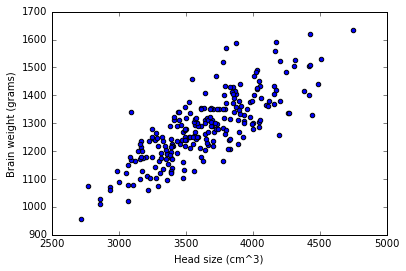

In [4]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Preparing the dataset

In [5]:
y = df['brain-weight'].values
y.shape

(237,)

In [6]:
X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(237, 1)

In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

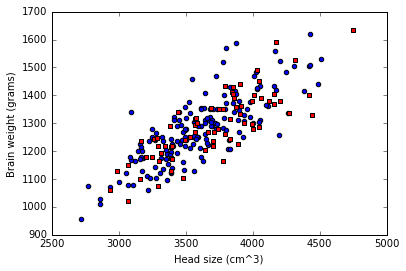

In [8]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Evaluating the model

In [10]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.635


In [11]:
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.635


In [12]:
lr.coef_

array([ 0.271117])

In [13]:
lr.intercept_

302.03033196088086

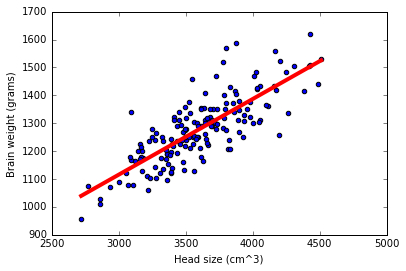

In [14]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

<div style='height:100px;'></div>

# 3 Introduction to Classification

### The Iris dataset

In [15]:
df = pd.read_csv('dataset_iris.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [77]:
X = df.iloc[:, :4].values 
y = df['class'].values
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Class label encoding

In [78]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

In [70]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Scikit-learn's in-build datasets

In [80]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Test/train splits

In [86]:
X, y = iris.data[:, :2], iris.target
# ! We only use 2 features for visual purposes

print('Class labels:', np.unique(y))
print('Class proportions:', np.bincount(y))

Class labels: [0 1 2]
Class proportions: [50 50 50]


In [91]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [32 40 33]


In [92]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123,
        stratify=y)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [35 35 35]


### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr.fit(X_train, y_train)
print('Test accuracy %.2f' % lr.score(X_test, y_test))

Test accuracy 0.800


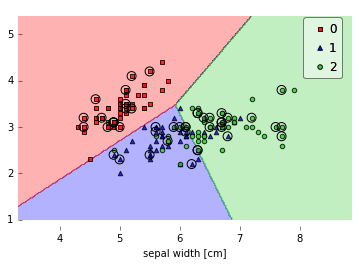

In [96]:
from mlxtend.evaluate import plot_decision_regions

plot_decision_regions

plot_decision_regions(X=X, y=y, clf=lr, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

### K-Nearest Neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=4)

kn.fit(X_train, y_train)
print('Test accuracy %.2f' % kn.score(X_test, y_test))

Test accuracy 0.82


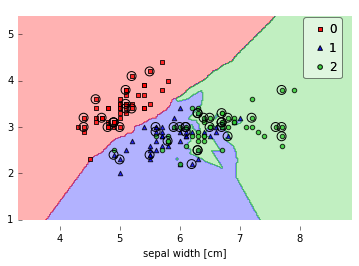

In [111]:
plot_decision_regions(X=X, y=y, clf=kn, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

### Exercises:
    
- What would be possible ways to resolve ties in KNN when `n_neighbors` is an even number?
- Can you find the right spot in the scikit-learn documentation to read about how scikit-learn handles this?
- Train & evaluate the Logistic Regression and KNN algorithms on the 4-dimensional iris datasets. 
  - What performance do you observe? 
  - Why is it different vs. using only 2 dimensions? 
  - Would adding more dimensions help?

<div style='height:100px;'></div>